In [186]:
import IPython
import numpy as np
import pandas as pd
from matplotlib import __version__ as plt_version
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pydotplus
%matplotlib inline

sns.set_style("whitegrid")
sns.set_context('talk')

np.random.seed(42)
# imports for Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, validation_curve


# import for KNN
from sklearn.neighbors import KNeighborsClassifier

# import for SVM
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# imports for Neural Network
import tensorflow as tf
import keras

from tqdm import tqdm

In [2]:
# Requirements to run this code 
print("Anaconda Notebook version: ",IPython.__version__ )
print("numpy version: ", np.__version__)
print("pandas version: ",pd.__version__)
print("matplotlib version: ", plt_version)
print("Sci-kit Learn version: ", sklearn.__version__)
print("Seaborn version: ", sns.__version__)
print("Grphviz version", graphviz.__version__)
print("Tensorflow Version", tf.__version__)
print("Keras Version", keras.__version__)

Anaconda Notebook version:  5.6.0
numpy version:  1.15.4
pandas version:  0.23.1
matplotlib version:  2.0.0
Sci-kit Learn version:  0.20.0
Seaborn version:  0.9.0
Grphviz version 0.10.1
Tensorflow Version 1.12.0
Keras Version 2.2.4


In [3]:
names = []
for feat in tqdm(range(617)):
    names.append('f_{}'.format(feat))
names.append('letter')

100%|██████████| 617/617 [00:00<00:00, 615576.97it/s]


In [4]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# url_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
# avila_tr = pd.read_csv('avila/avila-ts.txt', sep=',', header=None)
train_data = pd.read_csv('data/isolet1+2+3+4.data', header=None, names=names)
test_data = pd.read_csv('data/isolet5.data', header=None, names=names)


In [5]:
# load  the training data from 
train_data.head()


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0


In [6]:
# load  the training data from 
test_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Columns: 618 entries, f_0 to letter
dtypes: float64(618)
memory usage: 29.4 MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Columns: 618 entries, f_0 to letter
dtypes: float64(618)
memory usage: 7.4 MB


## 2. Data Preprocessing ##

In [9]:
def preprocess_data(data):
    ''' Change the categorical columns to numeric '''
    data = data.dropna()
    data = data.drop_duplicates()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].astype('category').cat.codes
    return data
    

In [10]:
train_df = preprocess_data(train_data)
test_df = preprocess_data(test_data)

In [11]:
print(train_df.shape)
train_df.head()

(6238, 618)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0


In [12]:
print(test_df.shape)
test_df.head()

(1559, 618)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0


## 3. Exploratory Data Analysis

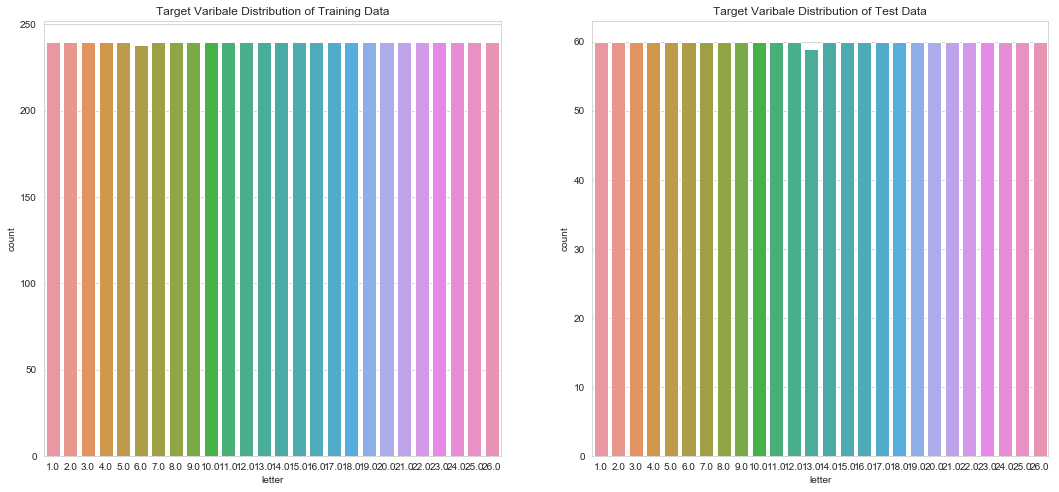

In [13]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
sns.countplot('letter', data=train_df)
plt.title('Target Varibale Distribution of Training Data')

plt.subplot(122)
sns.countplot('letter', data=test_df)
plt.title('Target Varibale Distribution of Test Data')

plt.show()


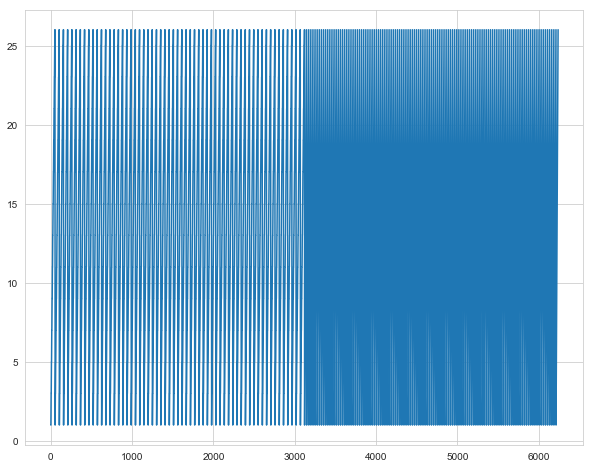

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(train_df.letter)
plt.show()

In [180]:
# generating features and target variable for training and testing
X = train_df.drop(columns='letter', axis=0)
y = train_df.letter

X_test = test_df.drop(columns='letter',axis=0)
y_test = test_df.letter

# 4. Experiments and Results 

## Artificial Neural Network

In [17]:
from keras.models import Sequential, save_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD, adam
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.fit_transform(X_test)

### Effect of number of layers

## K-Means Clustering


### KMeans clustering with Euclidean Distance

In [359]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score

100%|██████████| 27/27 [04:43<00:00, 10.50s/it]


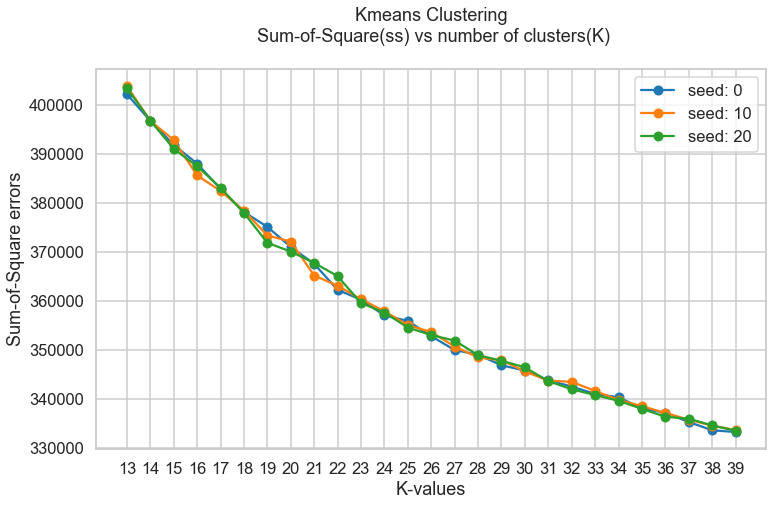

In [425]:
# Write code that applies the KMeans clustering method from scikit-learn to this matrix.
# apply elbow method to find the best K value

plt.figure(figsize=(12,7))
for rand in [0, 10, 20]:
    ks = []
    ss = []
    for k in tqdm(range(13, 40)):
        kmeans = KMeans(n_clusters=k, random_state=rand)
        kmeans.fit(X)
        ks.append(k)
        ss.append(kmeans.inertia_)
    plt.plot(ks, ss, marker='o', label='seed: {}'.format(rand) )
plt.title('Kmeans Clustering\n Sum-of-Square(ss) vs number of clusters(K)\n')
plt.xlabel('K-values')
plt.xticks(ks)
plt.ylabel('Sum-of-Square errors')
plt.legend()
plt.show()

100%|██████████| 14/14 [02:33<00:00, 10.96s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


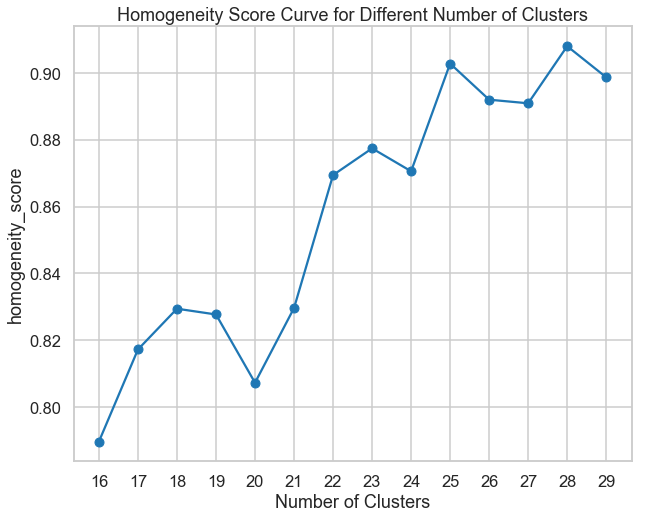

In [514]:
silhouette_avgs = []
hs = []
range_n_clusters = range(16, 30)

for n_clusters in tqdm(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))

# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, hs,marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters')
plt.legend()
plt.show()

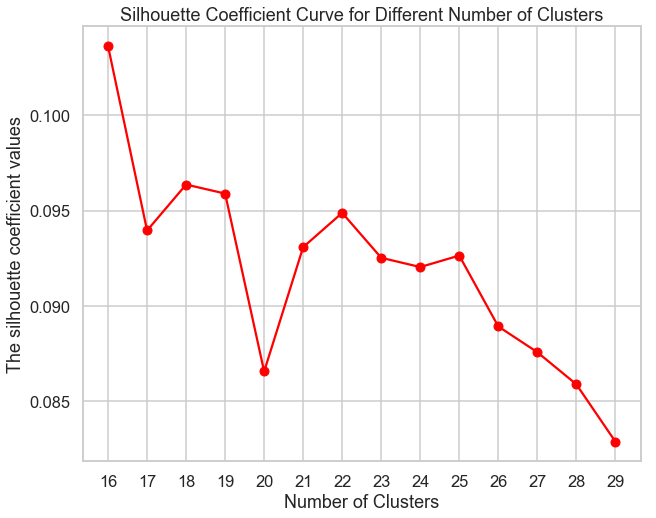

In [515]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters')
plt.show()

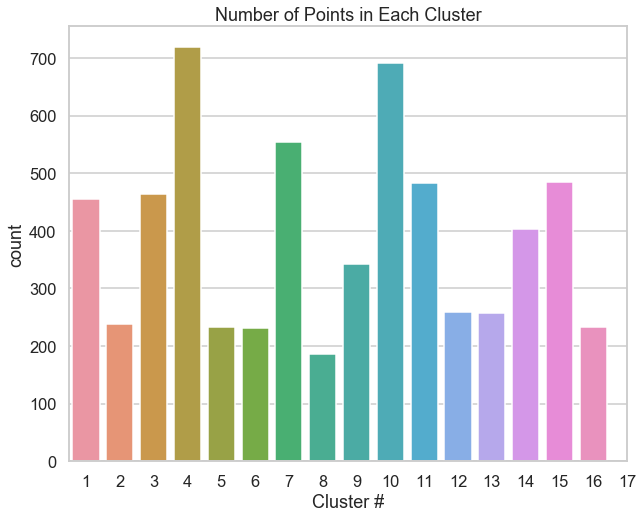

In [516]:
kmeans = KMeans(n_clusters=16, random_state=10)
y = kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster")
plt.xlabel("Cluster #")
plt.xticks(range(0,17),range(1,28))
plt.show()

## Gaussian Mixture ( EM) 

In [517]:
from sklearn.mixture import GaussianMixture

100%|██████████| 27/27 [07:47<00:00, 17.31s/it]


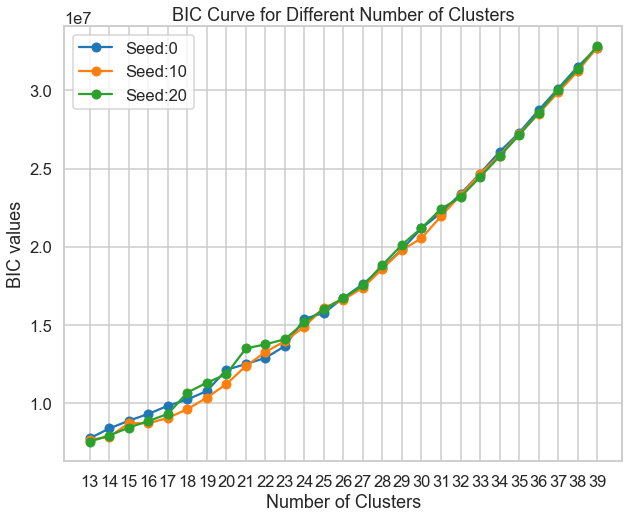

In [569]:
range_n_clusters = range(13, 40)
plt.figure(figsize=(10,8))
for rand in [0, 10, 20]:
    bic = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=rand)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        bic.append(clusterer.bic(X))
    plt.plot(range_n_clusters, bic, marker='o', label='Seed:{}'.format(rand))
    
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("BIC values")
plt.title('BIC Curve for Different Number of Clusters')
plt.legend()
plt.show()

100%|██████████| 15/15 [03:21<00:00, 13.40s/it]


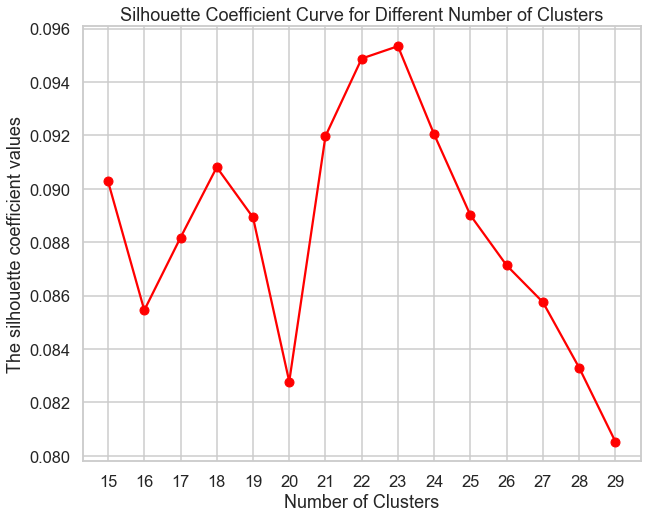

In [570]:
silhouette_avgs = []
hs = []
range_n_clusters = range(15, 30)

for n_clusters in tqdm(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))

plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


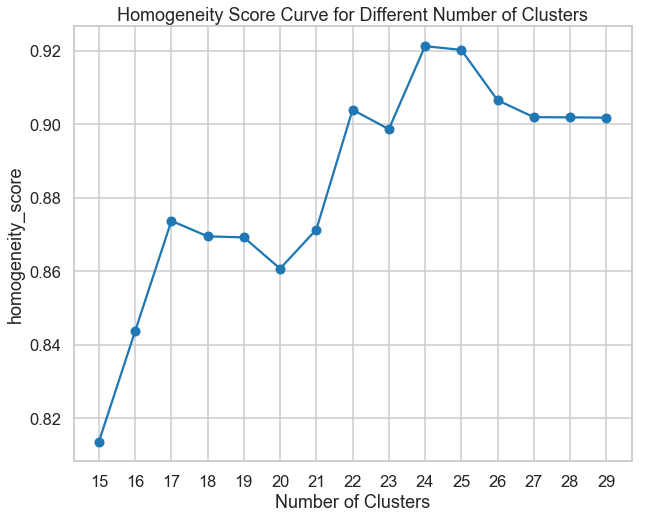

In [512]:
plt.figure(figsize=(10,8))
plt.plot(range_n_clusters, hs,marker='o')
plt.xlabel("Number of Clusters")
plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters')
plt.legend()
plt.show()

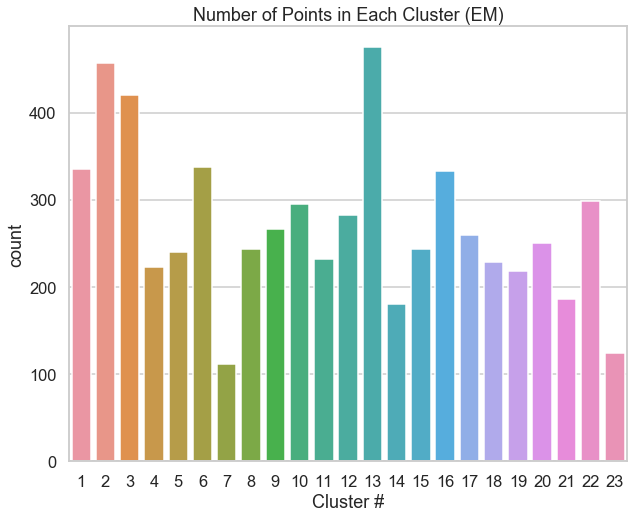

In [513]:
gmm = GaussianMixture(n_components=23, random_state=0)
y = gmm.fit_predict(X)
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster (EM)")
plt.xlabel("Cluster #")
plt.xticks(range(0,23),range(1,24))
plt.show()

## PCA

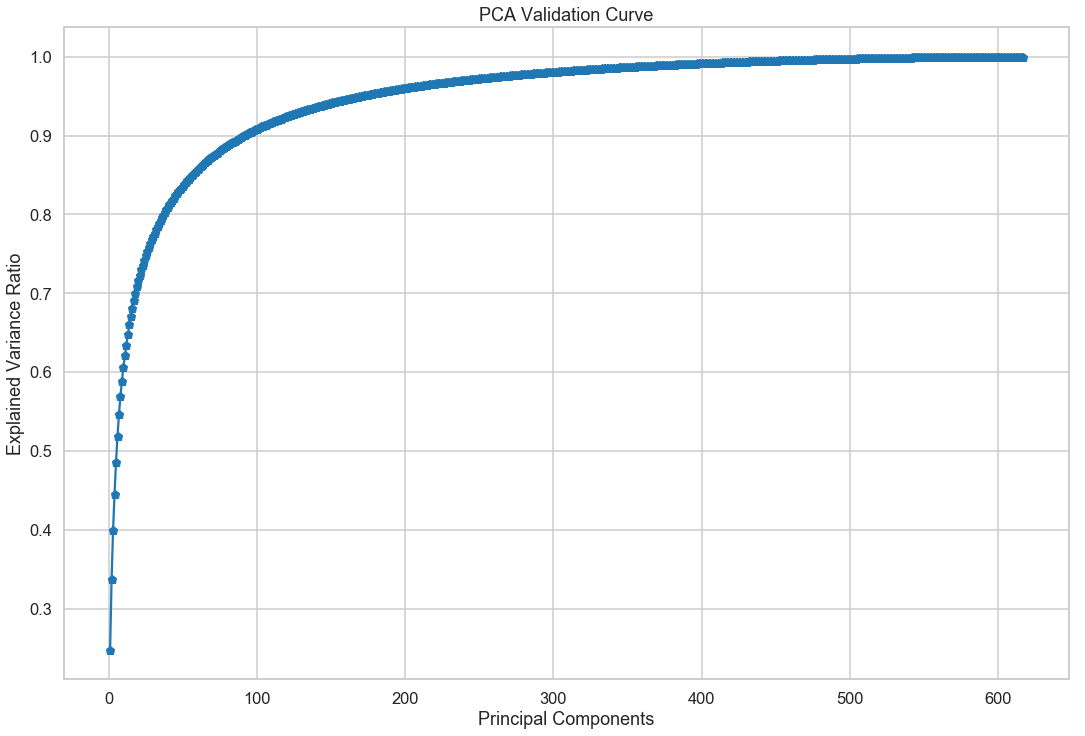

In [474]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(figsize=(18, 12))
plt.plot(range(1,618),np.cumsum(pca.explained_variance_ratio_), marker='p')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Validation Curve')
plt.show()

In [472]:
eig_val, eig_vec = np.linalg.eig(pca.get_covariance())

In [486]:
def kmeans_curves(X, range_n_clusters):
    silhouette_avgs = []
    hs = []

    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))
    return hs, silhouette_avgs

In [642]:
pca  = PCA(n_components=400)
X_new = pca.fit_transform(X)

In [643]:
hs, silhouette_avgs = kmeans_curves(X=X_new, range_n_clusters=range(13, 40))

100%|██████████| 27/27 [03:22<00:00,  7.50s/it]


In [644]:
def elbow_curve(X, kk):
    ks = []
    ss = []
    for k in tqdm(kk):
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(X)
        ks.append(k)
        ss.append(kmeans.inertia_)
    plt.figure(figsize=(10,8))
    plt.plot(ks, ss, marker='o' )
    plt.title('Kmeans Clustering\n Sum-of-Square(ss) vs number of clusters(K)\n')
    plt.xlabel('K-values')
    plt.xticks(ks)
    plt.ylabel('Sum-of-Square errors')
    plt.legend()
    plt.show()

100%|██████████| 27/27 [03:18<00:00,  7.36s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


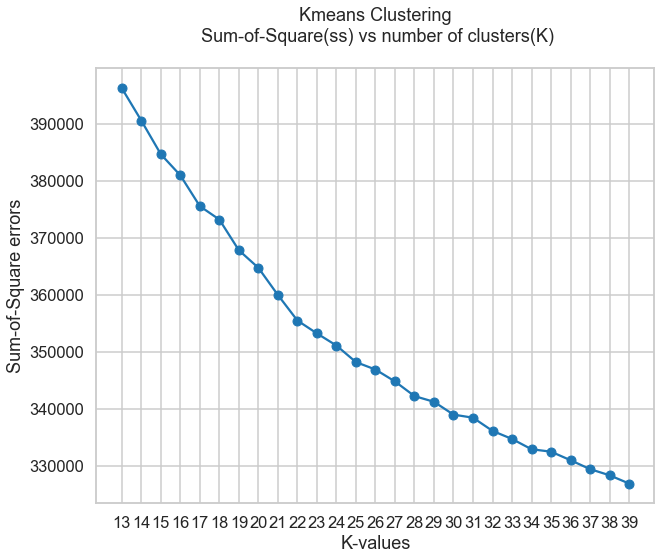

In [645]:
elbow_curve(X=X_new, kk=range(13,40))

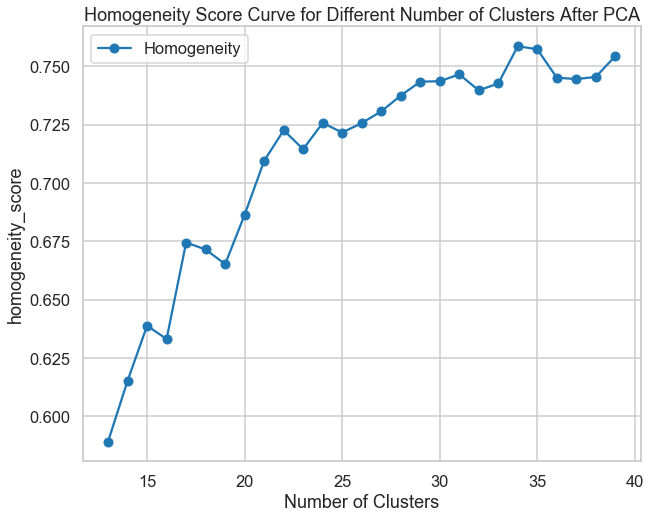

In [646]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), hs,marker='o', label='Homogeneity')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters After PCA')
plt.legend()
plt.show()


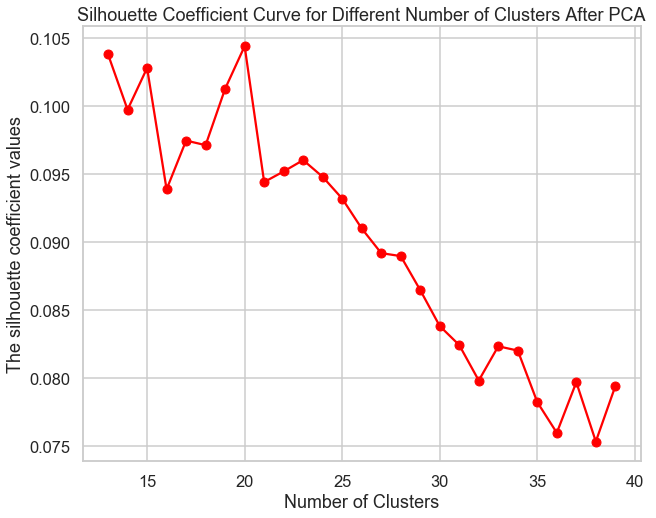

In [647]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters After PCA')
plt.show()

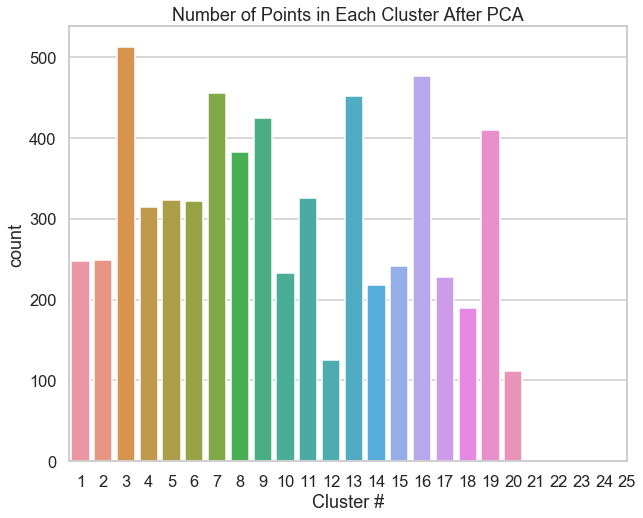

In [685]:
kmeans = KMeans(n_clusters=20, random_state=0)
pca_y = kmeans.fit_predict(X_new)

plt.figure(figsize=(10,8))
sns.countplot(pca_y)
plt.title("Number of Points in Each Cluster After PCA")
plt.xlabel("Cluster #")
plt.xticks(range(0,25),range(1,26))
plt.show()

In [648]:
def elbow_em_curve(X,range_n_clusters = range(13, 40)):
    bic = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        bic.append(clusterer.bic(X))
        
    plt.figure(figsize=(10,8))
    plt.plot(range_n_clusters, bic, marker='o')
    plt.xlabel("Number of Clusters")
    plt.xticks(range_n_clusters)
    plt.ylabel("BIC values")
    plt.title('BIC Curve for Different Number of Clusters')
    plt.legend()
    plt.show()
    
    
#-------------------------------------------------------------

def em_curves(X, range_n_clusters):
    silhouette_avgs = []
    hs = []
    for n_clusters in tqdm(range_n_clusters):
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        hs.append(homogeneity_score(labels_pred=cluster_labels, labels_true=y))
    return hs, silhouette_avgs



100%|██████████| 27/27 [02:36<00:00,  5.80s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


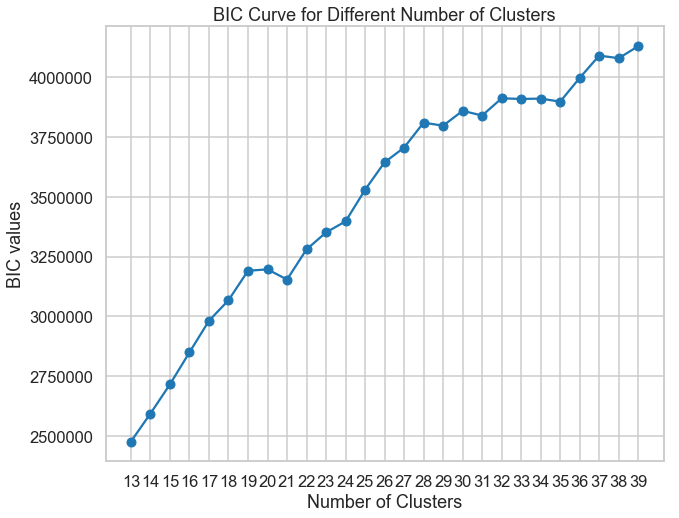

In [575]:
elbow_em_curve(X_new)

In [568]:
pca_hs, pca_sil = em_curves(X_new, range_n_clusters= range(13, 40))

100%|██████████| 27/27 [02:33<00:00,  5.67s/it]


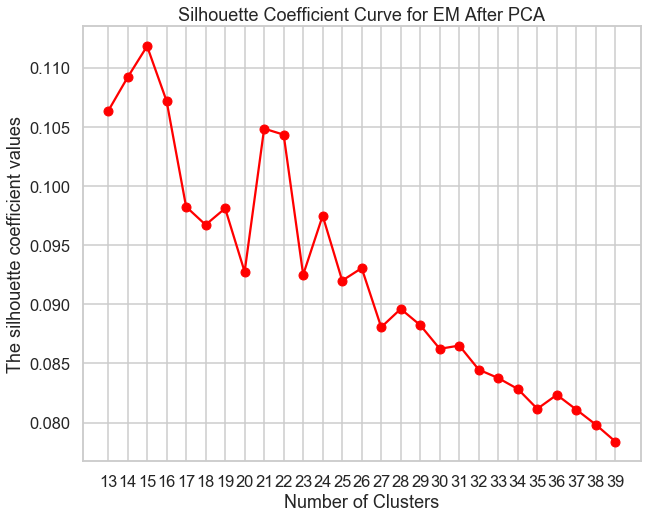

In [649]:
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), pca_sil,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range(13, 40))
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After PCA')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


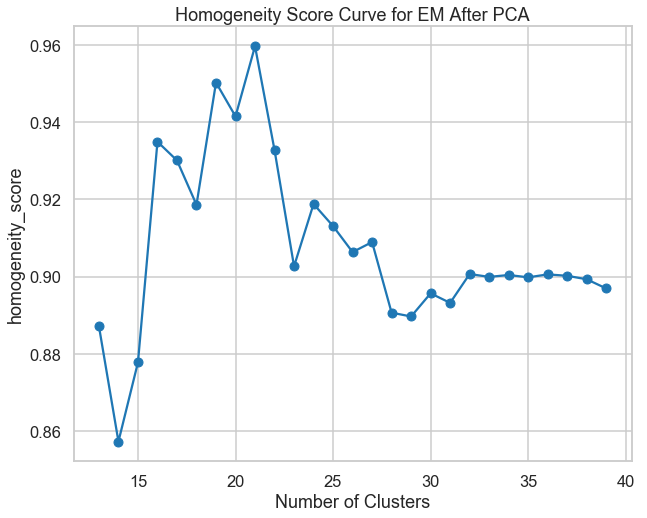

In [650]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), pca_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM After PCA')
plt.legend()
plt.show()

## ICA

In [519]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [547]:
kurt = []
for comp in tqdm(range(5,615,20)):
    ica = FastICA(n_components=comp, random_state=10)
    X_ica = ica.fit_transform(X)
    kurt.append(np.mean(kurtosis(X_ica)))

  0%|          | 0/31 [00:00<?, ?it/s]C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
  3%|▎         | 1/31 [00:00<00:20,  1.49it/s]C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
  6%|▋         | 2/31 [00:02<00:29,  1.03s/it]C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
 13%|█▎        | 4/31 [00:06<00:43,  1.60s/it]C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\

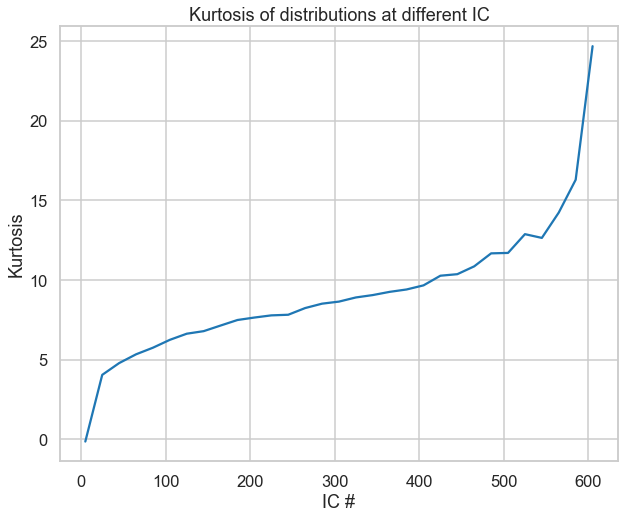

In [549]:
plt.figure(figsize=(10, 8))
plt.plot(range(5,615,20), kurt)
plt.title('Kurtosis of distributions at different IC')
plt.xlabel('IC #')
plt.ylabel('Kurtosis')
plt.show()


In [600]:
ica = FastICA(n_components=550, random_state=10)
X_ica = ica.fit_transform(X)

100%|██████████| 27/27 [11:30<00:00, 25.59s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


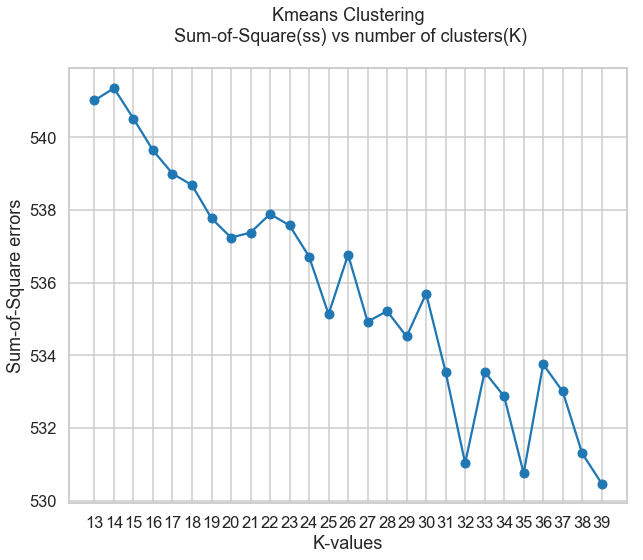

In [601]:
elbow_curve(X=X_ica, kk=range(13, 40))

In [588]:
hs, silhouette_avgs = kmeans_curves(X=X_ica, range_n_clusters=range(13, 40))

100%|██████████| 27/27 [07:42<00:00, 17.13s/it]


C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


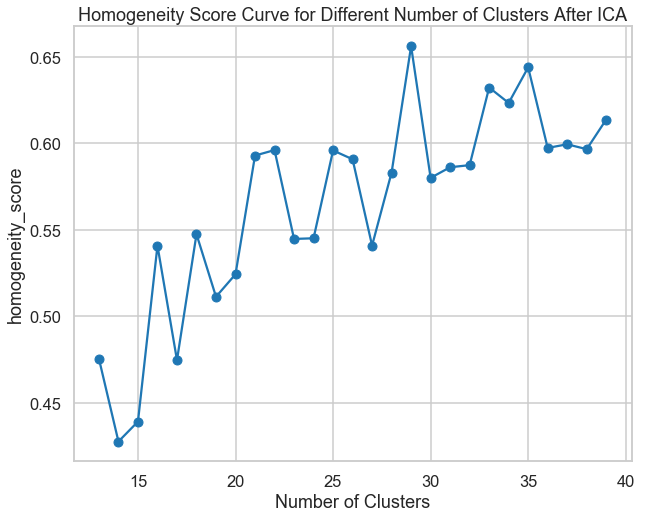

In [589]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Different Number of Clusters After ICA')
plt.legend()
plt.show()

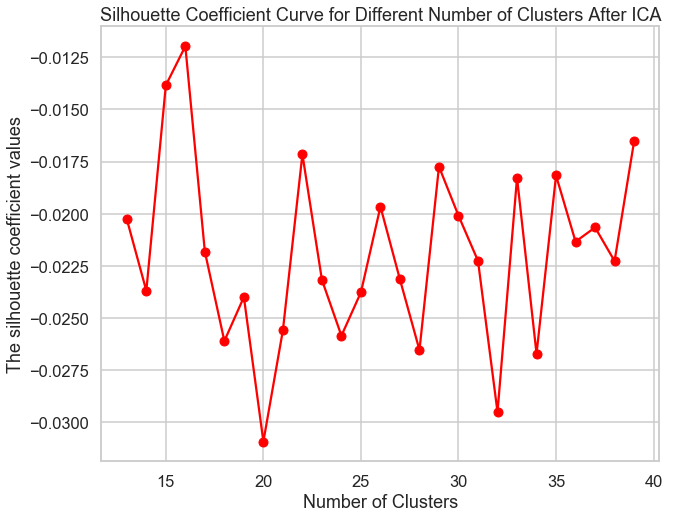

In [590]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Different Number of Clusters After ICA')
plt.show()

100%|██████████| 27/27 [13:11<00:00, 29.30s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


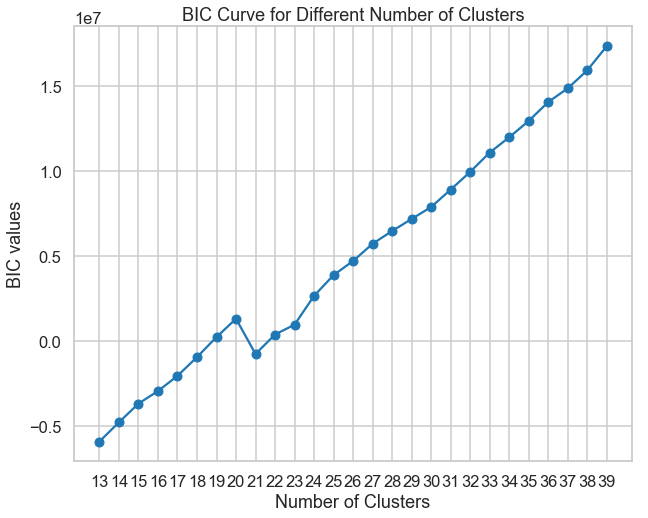

In [576]:
elbow_em_curve(X_ica)

In [572]:
ica_hs, ica_sil = em_curves(X_ica,range_n_clusters = range(13, 40))

100%|██████████| 27/27 [12:30<00:00, 27.81s/it]


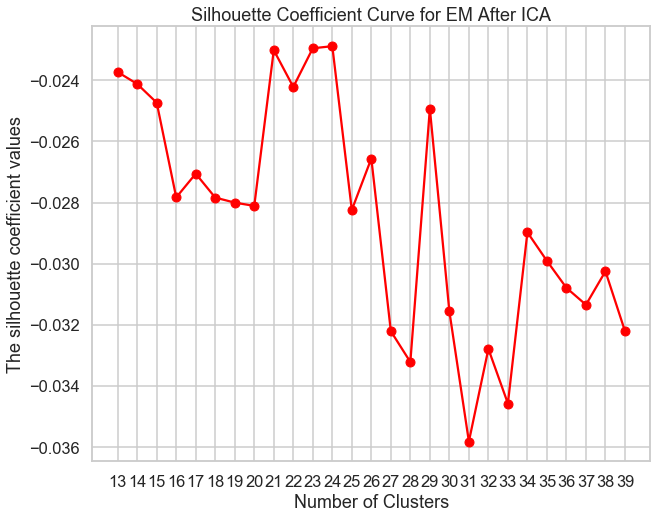

In [577]:
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), ica_sil,marker='o', c='r')
plt.xlabel("Number of Clusters")
plt.xticks(range(13, 40))
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After ICA')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


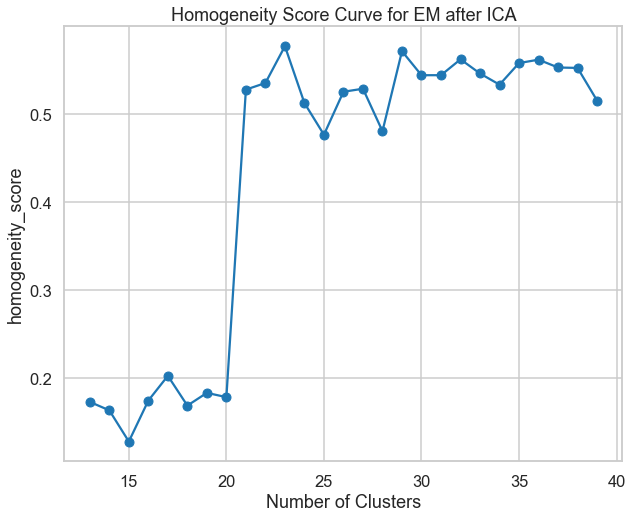

In [578]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), ica_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM after ICA')
plt.legend()
plt.show()

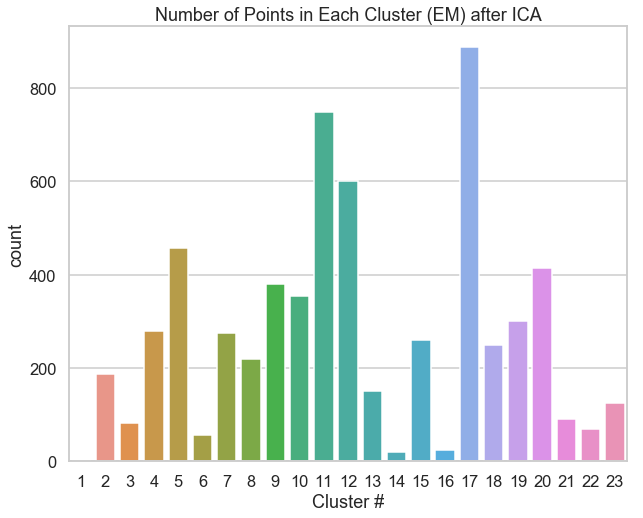

In [593]:
n_components= 23
gmm = GaussianMixture(n_components=n_components, random_state=0)
y = gmm.fit_predict(X_ica)
plt.figure(figsize=(10,8))
sns.countplot(y)
plt.title("Number of Points in Each Cluster (EM) after ICA")
plt.xlabel("Cluster #")
plt.xticks(range(0,n_components),range(1,n_components+1))
plt.show()

In [682]:
kmeans = KMeans(n_clusters=16, random_state=10)
ica_y = kmeans.fit_predict(X_ica)

Embedding 6238 samples with dim 617 using various random projections


  0%|          | 0/3 [00:00<?, ?it/s]

Projected 6238 samples from 617 to 300 in 0.065s
Random matrix with size: 0.090MB
Mean distances rate: 1.01 (0.08)


 33%|███▎      | 1/3 [01:36<03:12, 96.06s/it]

Projected 6238 samples from 617 to 400 in 0.067s
Random matrix with size: 0.118MB
Mean distances rate: 0.99 (0.06)


 67%|██████▋   | 2/3 [03:15<01:37, 97.59s/it]

Projected 6238 samples from 617 to 500 in 0.091s
Random matrix with size: 0.150MB
Mean distances rate: 1.00 (0.06)


100%|██████████| 3/3 [04:51<00:00, 97.01s/it]


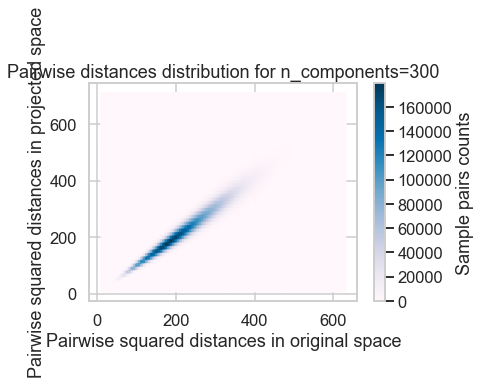

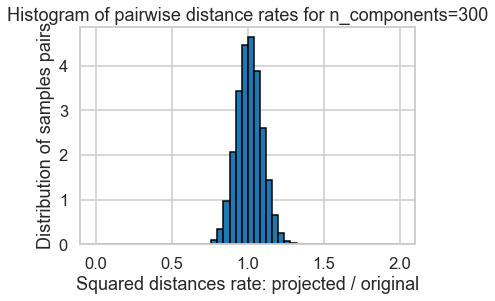

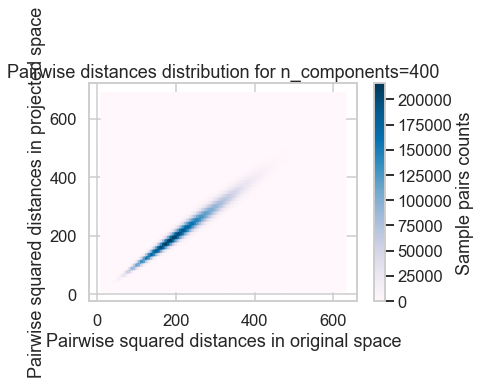

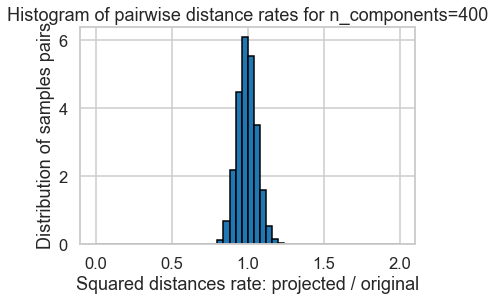

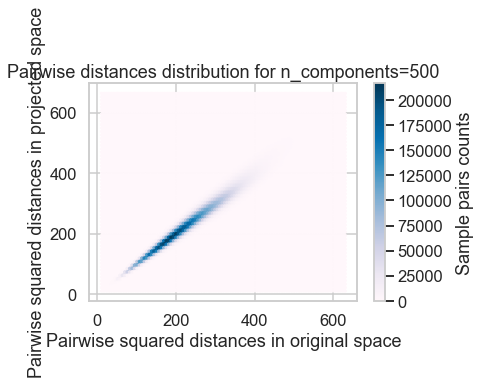

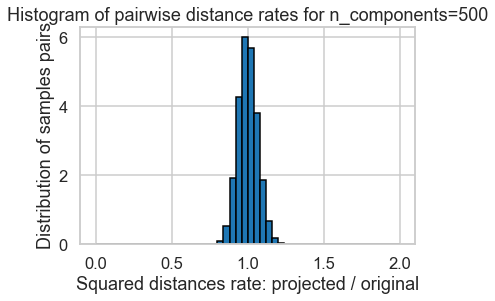

In [606]:
import sys
from time import time
import matplotlib
from distutils.version import LooseVersion
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}



# Part 2: perform sparse random projection of some digits images which are
# quite low dimensional and dense or documents of the 20 newsgroups dataset
# which is both high dimensional and sparse


data = X


n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 400, 500])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in tqdm(n_components_range):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

Embedding 6238 samples with dim 617 using various random projections


  0%|          | 0/3 [00:00<?, ?it/s]

Projected 6238 samples from 617 to 300 in 0.062s
Random matrix with size: 0.090MB
Mean distances rate: 1.03 (0.08)


 33%|███▎      | 1/3 [01:39<03:19, 99.96s/it]

Projected 6238 samples from 617 to 400 in 0.069s
Random matrix with size: 0.119MB
Mean distances rate: 0.99 (0.07)


 67%|██████▋   | 2/3 [03:19<01:39, 99.59s/it]

Projected 6238 samples from 617 to 500 in 0.086s
Random matrix with size: 0.148MB
Mean distances rate: 1.01 (0.07)


100%|██████████| 3/3 [04:53<00:00, 98.00s/it]


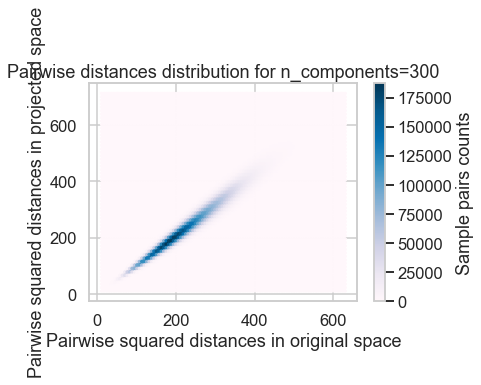

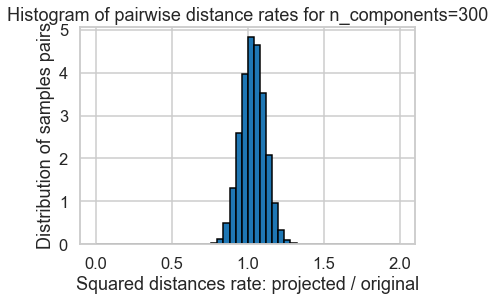

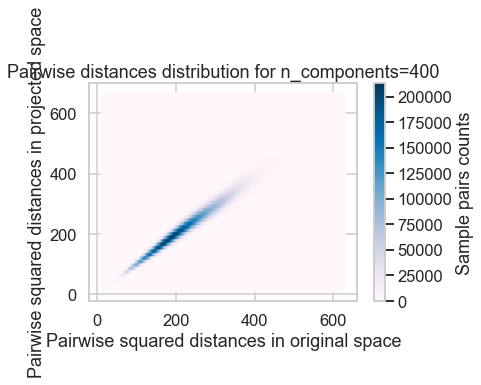

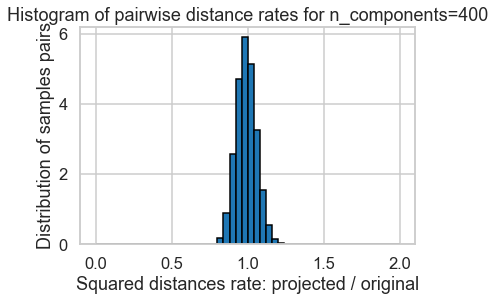

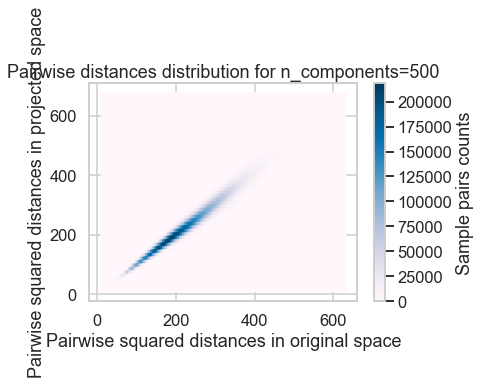

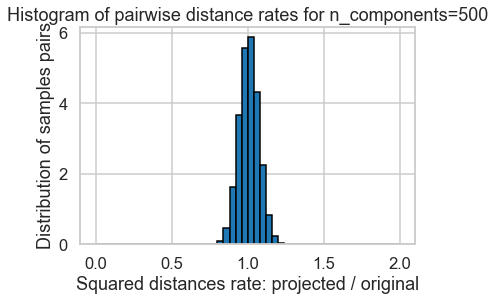

In [608]:
## Second run
n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

n_components_range = np.array([300, 400, 500])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]

for n_components in tqdm(n_components_range):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components, random_state=10)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure()
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure()
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

Embedding 6238 samples with dim 617 using various random projections


  0%|          | 0/2 [00:00<?, ?it/s]

Projected 6238 samples from 617 to 300 in 0.061s
Random matrix with size: 0.092MB
Mean distances rate: 1.03 (0.08)


 50%|█████     | 1/2 [01:34<01:34, 94.30s/it]

Projected 6238 samples from 617 to 300 in 0.053s
Random matrix with size: 0.090MB
Mean distances rate: 1.05 (0.09)


100%|██████████| 2/2 [03:07<00:00, 93.97s/it]


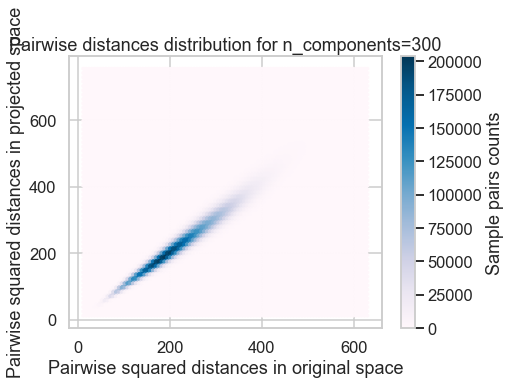

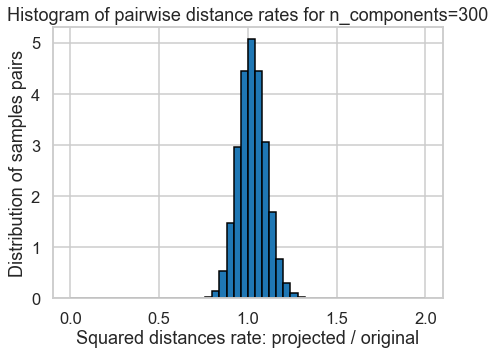

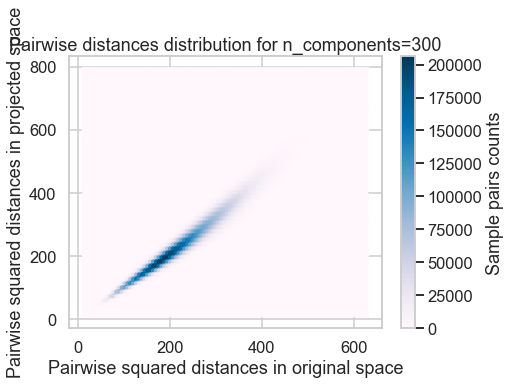

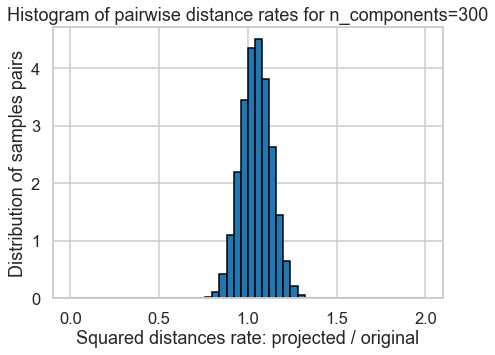

In [611]:
## Second run
n_samples, n_features = data.shape
print("Embedding %d samples with dim %d using various random projections"
      % (n_samples, n_features))

# n_components_range = np.array([300, 400, 500])
dists = euclidean_distances(data, squared=True).ravel()

# select only non-identical samples pairs
nonzero = dists != 0
dists = dists[nonzero]
n_components = 300
for rand in tqdm([0, 20]):
    t0 = time()
    rp = SparseRandomProjection(n_components=n_components, random_state=rand)
    projected_data = rp.fit_transform(data)
    print("Projected %d samples from %d to %d in %0.3fs"
          % (n_samples, n_features, n_components, time() - t0))
    if hasattr(rp, 'components_'):
        n_bytes = rp.components_.data.nbytes
        n_bytes += rp.components_.indices.nbytes
        print("Random matrix with size: %0.3fMB" % (n_bytes / 1e6))

    projected_dists = euclidean_distances(
        projected_data, squared=True).ravel()[nonzero]

    plt.figure(figsize=(7, 5))
    plt.hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.PuBu)
    plt.xlabel("Pairwise squared distances in original space")
    plt.ylabel("Pairwise squared distances in projected space")
    plt.title("Pairwise distances distribution for n_components=%d" %
              n_components)
    cb = plt.colorbar()
    cb.set_label('Sample pairs counts')

    rates = projected_dists / dists
    print("Mean distances rate: %0.2f (%0.2f)"
          % (np.mean(rates), np.std(rates)))

    plt.figure(figsize=(7, 5))
    plt.hist(rates, bins=50, range=(0., 2.), edgecolor='k', **density_param)
    plt.xlabel("Squared distances rate: projected / original")
    plt.ylabel("Distribution of samples pairs")
    plt.title("Histogram of pairwise distance rates for n_components=%d" %
              n_components)

plt.show()

In [607]:
rp = SparseRandomProjection(n_components=300)
X_rp = rp.fit_transform(X)

100%|██████████| 27/27 [02:43<00:00,  6.05s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


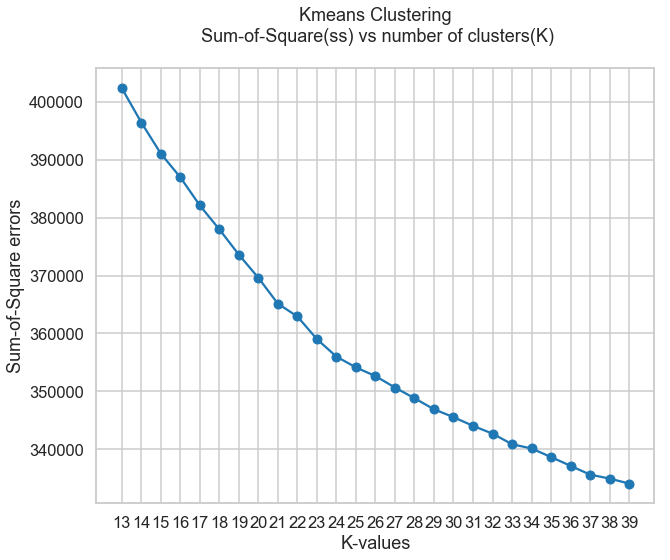

In [613]:
elbow_curve(X_rp, kk=range(13,40))

100%|██████████| 27/27 [03:26<00:00,  7.64s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


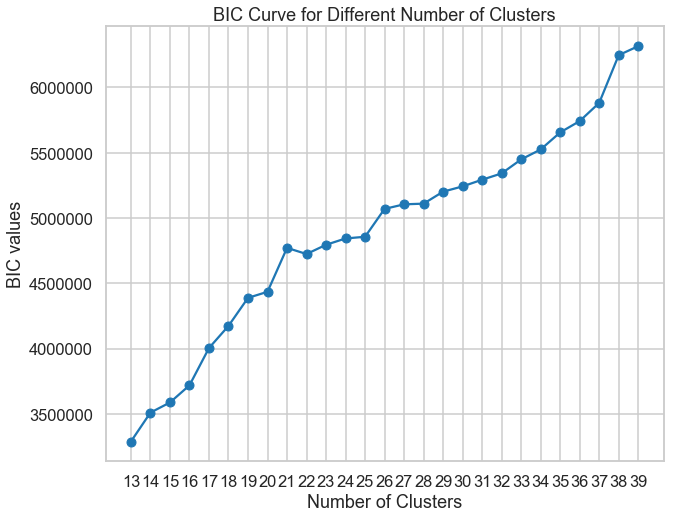

In [614]:
elbow_em_curve(X_rp, range_n_clusters=range(13,40))

In [615]:
rp_hs, rp_sil = em_curves(X_rp,range_n_clusters = range(13, 40))

100%|██████████| 27/27 [03:00<00:00,  6.70s/it]


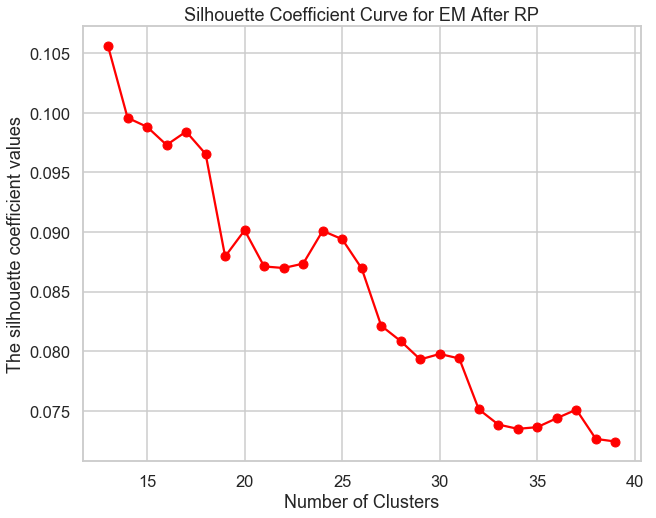

In [661]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), rp_sil,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After RP')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


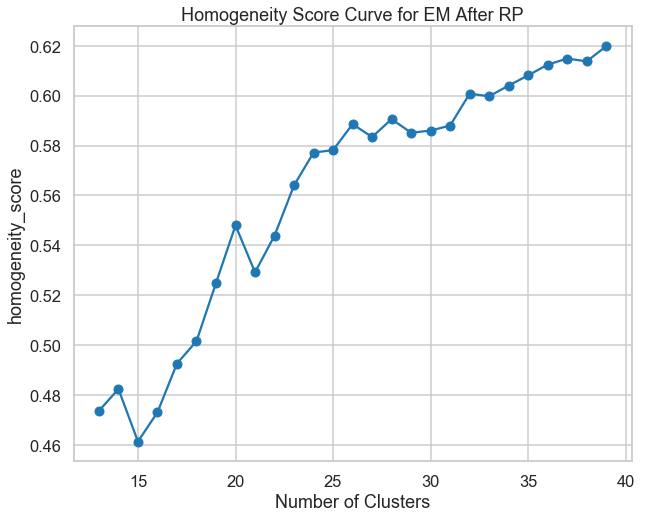

In [660]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), rp_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM After RP')
plt.legend()
plt.show()

In [616]:
krp_hs, krp_silhouette_avgs = kmeans_curves(X=X_rp, range_n_clusters=range(13, 40))

100%|██████████| 27/27 [03:18<00:00,  7.36s/it]


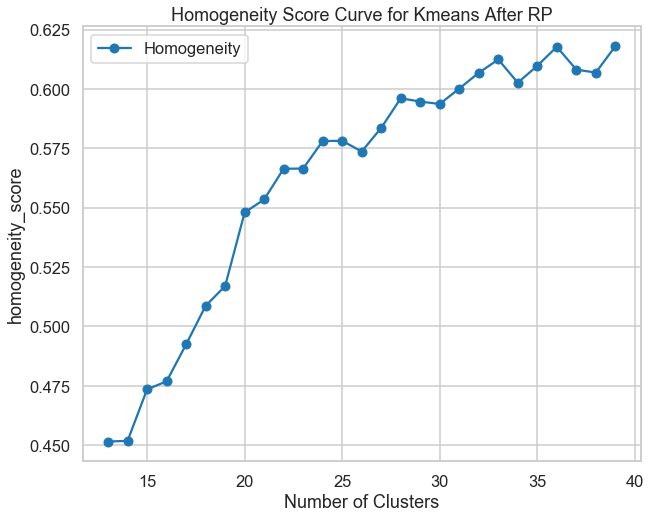

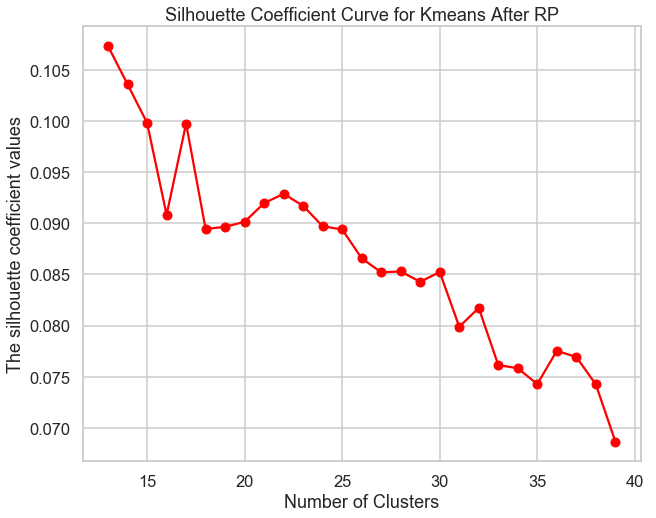

In [656]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), krp_hs,marker='o', label='Homogeneity')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Kmeans After RP')
plt.legend()
plt.show()
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), krp_silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Kmeans After RP')
plt.show()

In [686]:
kmeans = KMeans(n_clusters=20, random_state=10)
rp_y = kmeans.fit_predict(X_rp)

In [618]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

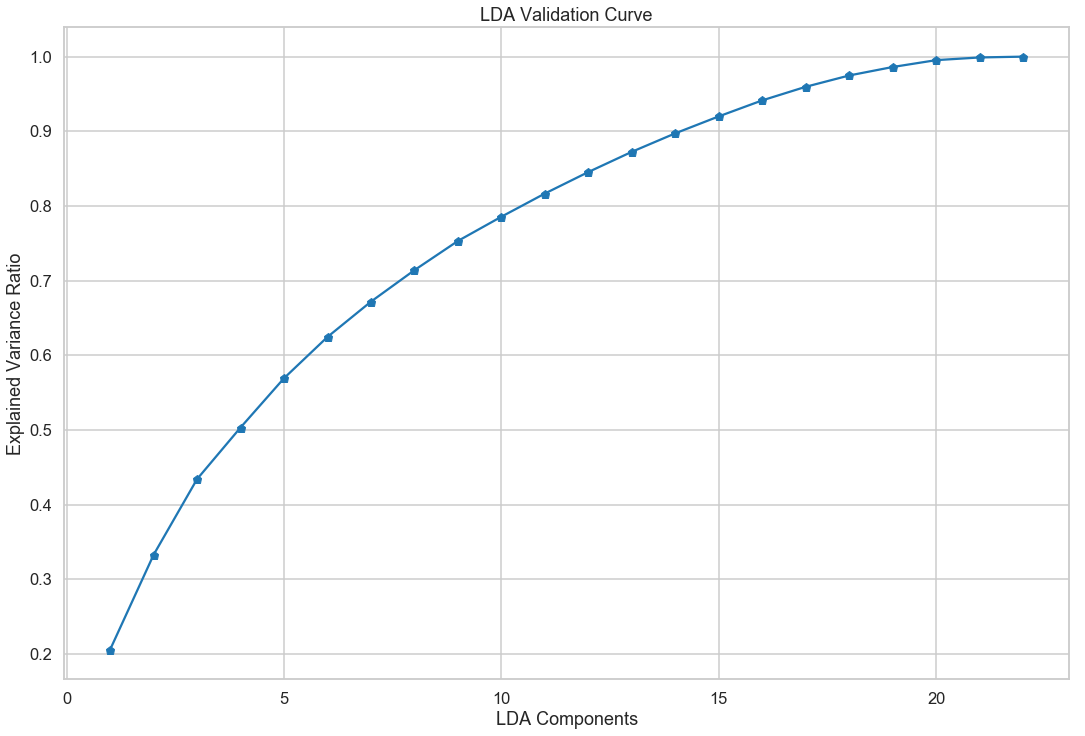

In [625]:
from sklearn.decomposition import PCA
lda = LDA()

lda.fit(X, y)
plt.figure(figsize=(18, 12))
plt.plot(range(1,len(lda.explained_variance_ratio_)+1),np.cumsum(lda.explained_variance_ratio_), marker='p')
plt.xlabel('LDA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('LDA Validation Curve')
plt.show()

In [677]:
lda = LDA(n_components=20)
X_lda = lda.fit_transform(X, y)

100%|██████████| 27/27 [00:44<00:00,  1.67s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


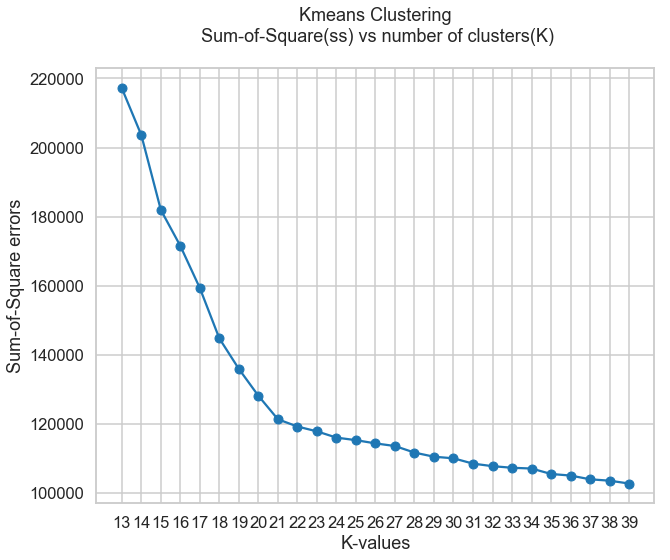

In [631]:
elbow_curve(X_lda, range(13,40))

100%|██████████| 27/27 [01:05<00:00,  2.44s/it]
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


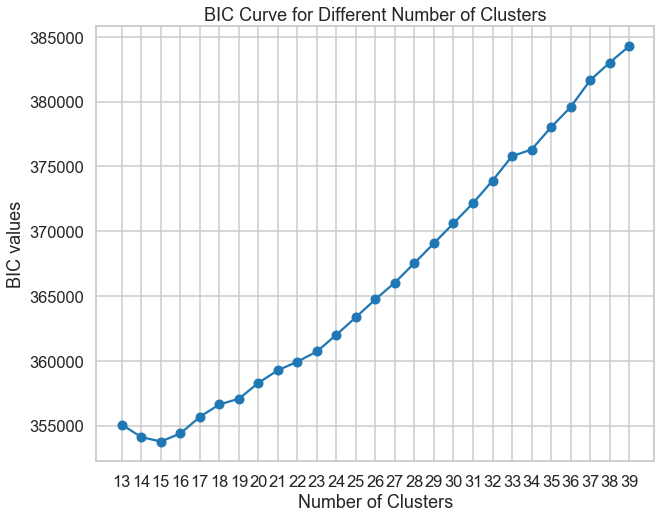

In [632]:
elbow_em_curve(X_lda, range(13,40))

In [633]:
lda_hs, lda_sil = em_curves(X_lda,range_n_clusters = range(13, 40))

100%|██████████| 27/27 [01:18<00:00,  2.90s/it]


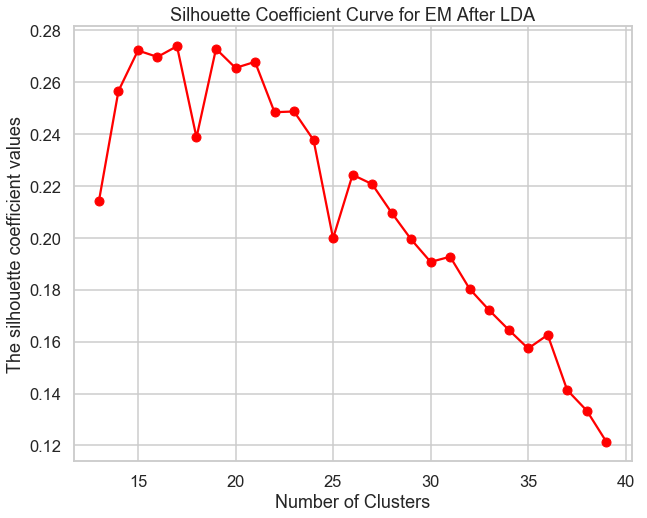

In [659]:
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), lda_sil,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for EM After LDA')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


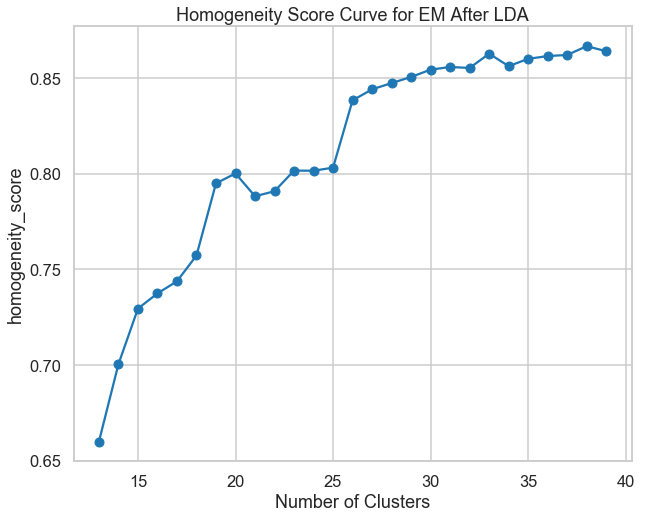

In [658]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), lda_hs,marker='o')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for EM After LDA')
plt.legend()
plt.show()

In [634]:
klda_hs, klda_silhouette_avgs = kmeans_curves(X=X_lda, range_n_clusters=range(13, 40))

100%|██████████| 27/27 [01:01<00:00,  2.26s/it]


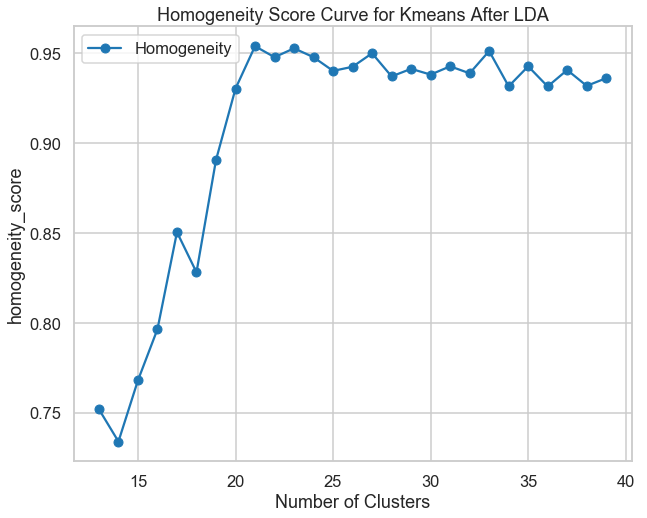

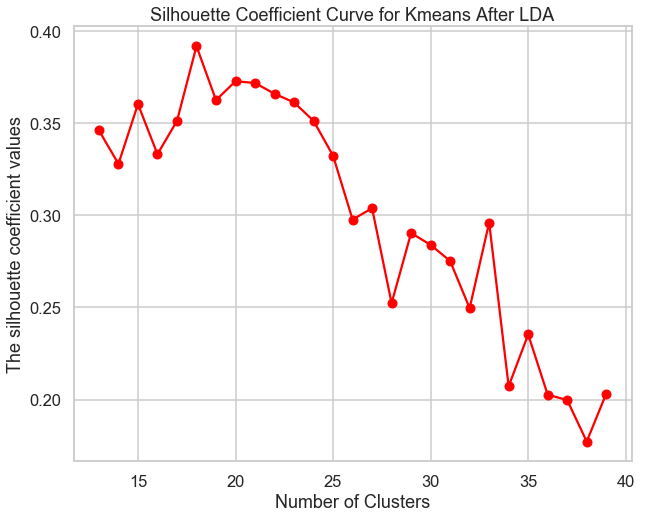

In [657]:
# homogneity curve
plt.figure(figsize=(10,8))
plt.plot(range(13,40), klda_hs,marker='o', label='Homogeneity')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel('homogeneity_score')
plt.title('Homogeneity Score Curve for Kmeans After LDA')
plt.legend()
plt.show()
# Silhouette curve 
plt.figure(figsize=(10,8))
plt.plot(range(13, 40), klda_silhouette_avgs,marker='o', c='r')
plt.xlabel("Number of Clusters")
# plt.xticks(range_n_clusters)
plt.ylabel("The silhouette coefficient values")
plt.title('Silhouette Coefficient Curve for Kmeans After LDA')
plt.show()

In [687]:
kmeans = KMeans(n_clusters=18, random_state=0)
lda_y = kmeans.fit_predict(X_lda)

In [62]:
np.random.seed(45)
# Create the new model: model_2
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=SGD(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X, to_categorical(y-1),
                               epochs=100,
                               validation_data = (X_test, to_categorical(y_test-1)),
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(X_test, to_categorical(y_test-1), verbose=False)

[0.17399210791086217, 0.9474021810381132]

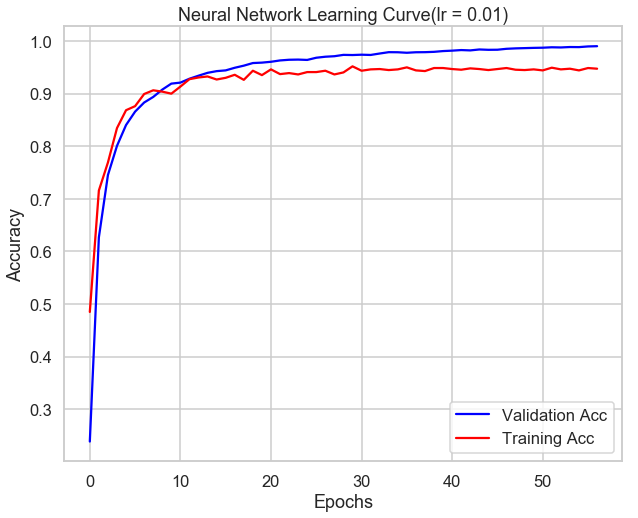

In [408]:
plt.figure(figsize=(10, 8))
plt.plot(model_2_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_2_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(lr = 0.01)')
plt.show()

In [662]:
# generating features and target variable for training and testing
X = train_df.drop(columns='letter', axis=0)
y = train_df.letter

X_test = test_df.drop(columns='letter',axis=0)
y_test = test_df.letter

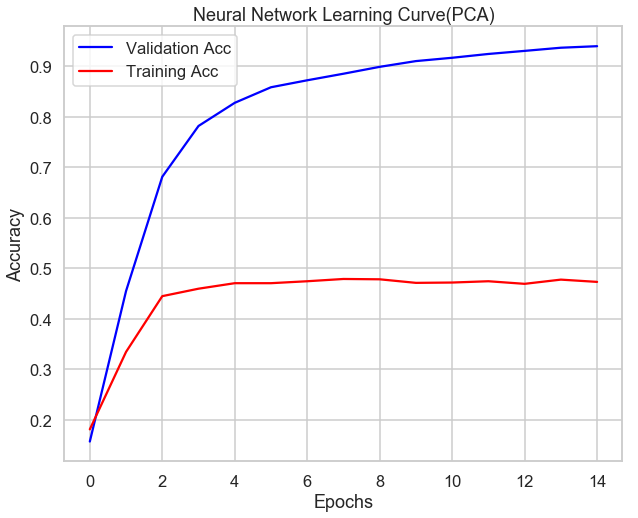

In [667]:
np.random.seed(45)
# Create the new model: model_2
input_shape = (X_new.shape[1],)
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=SGD(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X_new, to_categorical(y-1),
                               epochs=100,
                               validation_data = (pca.fit_transform(X_test), to_categorical(y_test-1)),
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(pca.fit_transform(X_test), to_categorical(y_test-1), verbose=False)

plt.figure(figsize=(10, 8))
plt.plot(model_2_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_2_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(PCA)')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


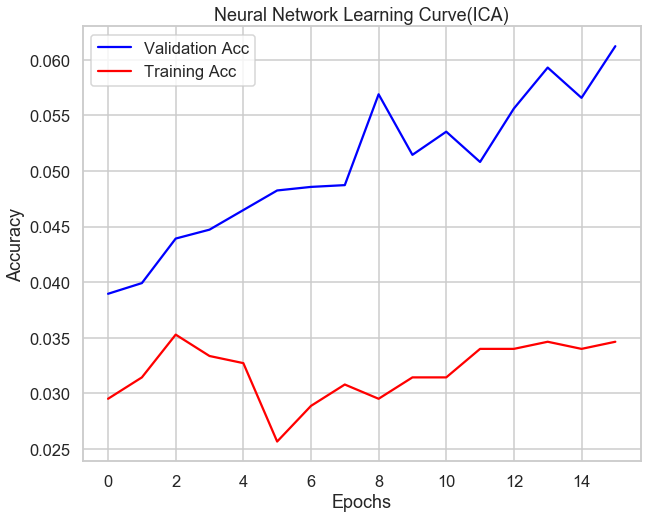

In [669]:
np.random.seed(45)
# Create the new model: model_2
input_shape = (X_ica.shape[1],)
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=SGD(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X_ica, to_categorical(y-1),
                               epochs=100,
                               validation_data = (ica.fit_transform(X_test), to_categorical(y_test-1)),
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(ica.fit_transform(X_test), to_categorical(y_test-1), verbose=False)

plt.figure(figsize=(10, 8))
plt.plot(model_2_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_2_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(ICA)')
plt.show()

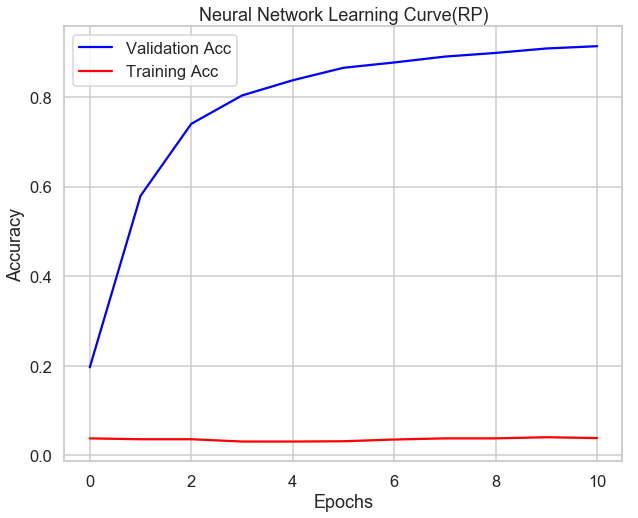

In [670]:
np.random.seed(45)
# Create the new model: model_2
input_shape = (X_rp.shape[1],)
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=SGD(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X_rp, to_categorical(y-1),
                               epochs=100,
                               validation_data = (rp.fit_transform(X_test), to_categorical(y_test-1)),
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(rp.fit_transform(X_test), to_categorical(y_test-1), verbose=False)

plt.figure(figsize=(10, 8))
plt.plot(model_2_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_2_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(RP)')
plt.show()

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


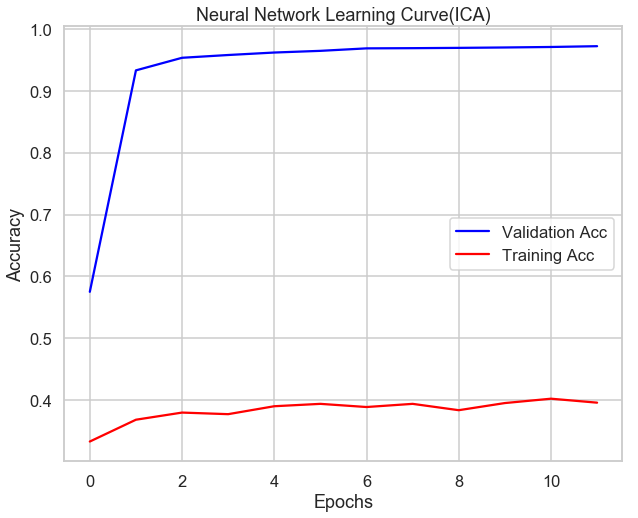

In [678]:
np.random.seed(45)
# Create the new model: model_2
input_shape = (X_lda.shape[1],)
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(50, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=SGD(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X_lda, to_categorical(y-1),
                               epochs=100,
                               validation_data = (lda.fit_transform(X_test, y_test), to_categorical(y_test-1)),
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(lda.fit_transform(X_test, y_test), to_categorical(y_test-1), verbose=False)

plt.figure(figsize=(10, 8))
plt.plot(model_2_training.history['acc'], color='b', label='Validation Acc')
plt.plot(model_2_training.history['val_acc'], color='r',label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(ICA)')
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [383]:
import numpy as np


class Kmeans(object):
    """ Kmeans implementation with Manhattan Distance Metrics """

    def __init__(self, n_clusters, max_iterations=50, snapshot_steps=1000):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.snapshot_steps = snapshot_steps

    def fit(self, X):
        """ splitting data into n_clusters clusters """
        self._centroids = self._initialize_centroids(X)
        clusters = np.zeros(X.shape[0])
        self._distances = np.zeros((X.shape[0], self.n_clusters))

        for iteration in range(self.max_iterations):
            clusters = self._find_closest_centroid(X)
            for cluster in range(self.n_clusters):
                self._centroids[cluster] = np.mean(X[clusters == cluster], axis=0)
                
        return clusters,self._centroids

    def _initialize_centroids(self, X):
        """ initialize centroids """
        return X[np.random.randint(X.shape[0], size=self.n_clusters)]

    def _find_closest_centroid(self, X):
        """ find closest centroid to each point in dataset """
        for cluster in range(self.n_clusters):
            self._distances[:, cluster] = np.sum(np.abs(X - self._centroids[cluster]), axis=1 )

        return np.argmin(self._distances, axis=1)

    def predict(self, X):
        """ predict cluster for a given set of points """
        return self._find_closest_centroid(X)